In [45]:
import sounddevice as sd
from scipy.io.wavfile import write, read
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd


In [27]:
# Define Sampling Rate or Frequency in Hz
sr = 44100

# Record duration in seconds
duration = 10

In [28]:
# Start audio recording (The quick brown fox jumps over the lazy dog)
recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("brownfox.wav",sr,recording)

recording...............


In [29]:
# Start audio recording (We promptly judged antique ivory buckles for the next prize)
recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("ivory.wav",sr,recording)

recording...............


In [30]:
# Start audio recording (Crazy Fredrick bought many very exquisite opal jewels)
recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("opal.wav",sr,recording)

recording...............


recording shape (220500,)
sampling rate 22050


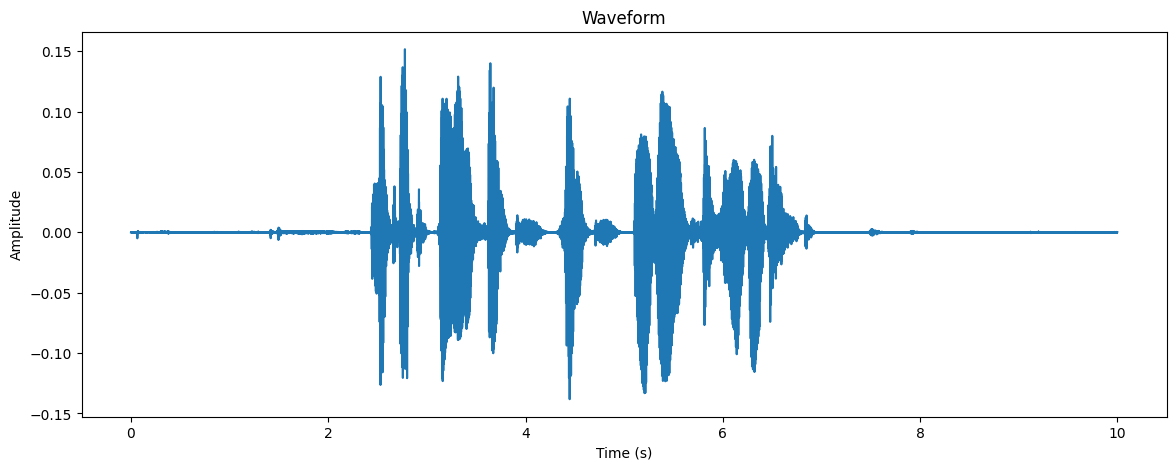

In [31]:
# Look at the discrete number array we got from the audio
x, sr = librosa.load('brownfox.wav')
print("recording shape", x.shape)
print("sampling rate", sr)

# Create a time axis in seconds
time = np.arange(0, len(x)) / sr

plt.figure(figsize=(14, 5))
plt.plot(time, x)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

recording shape (220500,)
sampling rate 22050


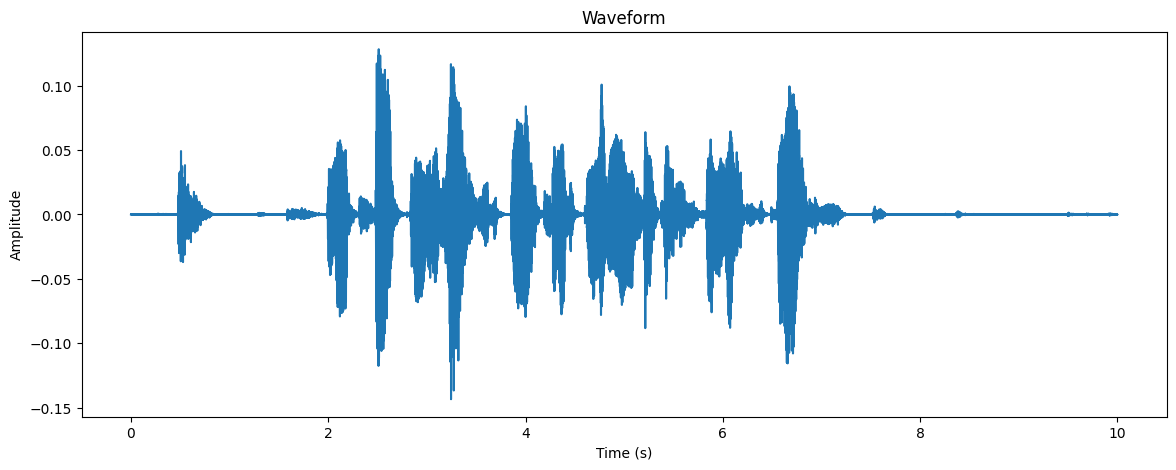

In [32]:
# Look at the discrete number array we got from the audio
y, sr = librosa.load('ivory.wav')
print("recording shape", y.shape)
print("sampling rate", sr)

# Create a time axis in seconds
time = np.arange(0, len(y)) / sr

plt.figure(figsize=(14, 5))
plt.plot(time, y)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

recording shape (220500,)
sampling rate 22050


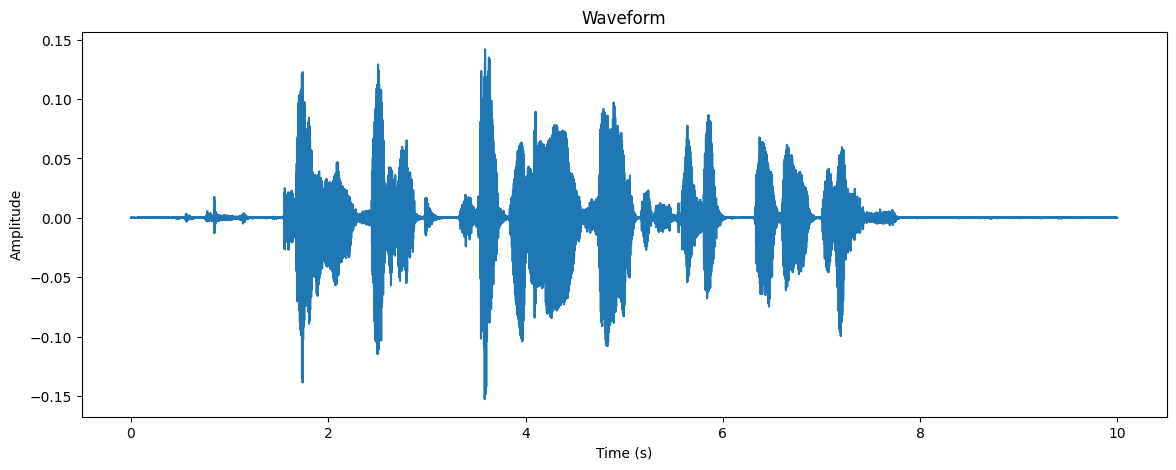

In [33]:
# Look at the discrete number array we got from the audio
z, sr = librosa.load('opal.wav')
print("recording shape", z.shape)
print("sampling rate", sr)

# Create a time axis in seconds
time = np.arange(0, len(z)) / sr

plt.figure(figsize=(14, 5))
plt.plot(time, z)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [34]:
data, sampling_rate = librosa.load("brownfox.wav", sr = 44000)
print(data.shape)
print(sampling_rate)

data2, sampling_rate2 = librosa.load("ivory.wav", sr = 44000)
print(data2.shape)
print(sampling_rate2)

data3, sampling_rate3 = librosa.load("opal.wav", sr = 44000)
print(data3.shape)
print(sampling_rate3)

(440000,)
44000
(440000,)
44000
(440000,)
44000


In [35]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
print(freq.shape)
freq2 = librosa.amplitude_to_db(np.abs(librosa.stft(data2)), ref=np.max)
print(freq2.shape)
freq3 = librosa.amplitude_to_db(np.abs(librosa.stft(data3)), ref=np.max)
print(freq3.shape)

(1025, 860)
(1025, 860)
(1025, 860)


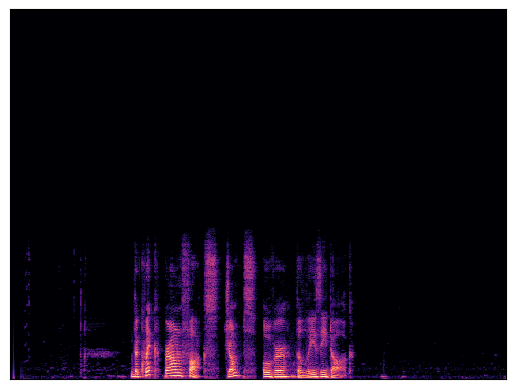

In [36]:
librosa.display.specshow(freq)


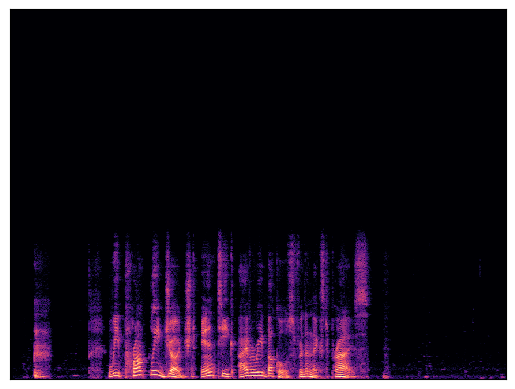

In [37]:
librosa.display.specshow(freq2)


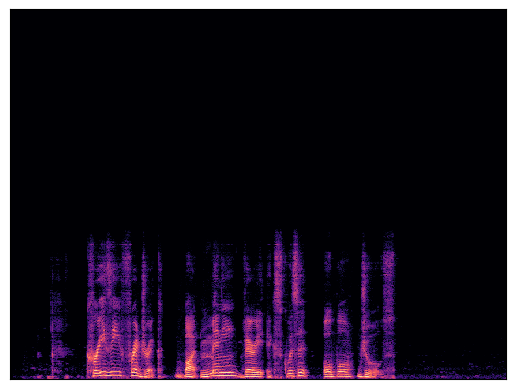

In [38]:
librosa.display.specshow(freq3)

In [56]:
stereo_audio_data = np.column_stack((x, x))
write("stereo.wav",sr*2,recording)

print(stereo_audio_data)



[[-1.2170585e-07 -1.2170585e-07]
 [-1.5612779e-05 -1.5612779e-05]
 [ 1.5712765e-06  1.5712765e-06]
 ...
 [ 1.8471623e-04  1.8471623e-04]
 [ 1.7706123e-04  1.7706123e-04]
 [ 2.0190550e-04  2.0190550e-04]]


In [59]:
average_delay_samples = 20
stereo_signal_delayed_avg = np.column_stack((stereo_audio_data[:, 0], np.roll(stereo_audio_data[:, 1], average_delay_samples)))

sr=22050

write("stereo_delayed.wav", sr, stereo_signal_delayed_avg)

for delay_ms in [1, 10, 100]:
    delay_samples = int((delay_ms / 1000) * sr)
    stereo_signal_delayed = np.column_stack((stereo_audio_data[:, 0], np.roll(stereo_audio_data[:, 1], delay_samples)))
    
    write(f"stereo-{delay_ms}ms.wav", sr, stereo_signal_delayed)

In [61]:

def attenuate_right_channel(signal, attenuation):
    signal[:, 1] *= attenuation
    return signal




for attenuation_db in [-1.5, -3, -6]:
    attenuation_factor = 10 ** (attenuation_db / 20.0)  
    attenuated_signal_0ms = attenuate_right_channel(stereo_audio_data, attenuation_factor)
    write(f"stereo-{attenuation_db}dB.wav", sr, attenuated_signal_0ms.astype(np.float32))


for attenuation_db in [-1.5, -3, -6]:
    attenuation_factor = 10 ** (attenuation_db / 20.0)  
    attenuated_signal_avghead = attenuate_right_channel(stereo_signal_delayed_avg, attenuation_factor)
    write(f"stereo_delayed-{attenuation_db}dB.wav", sr, attenuated_signal_avghead.astype(np.float32))
